In [1]:
# Load packages which are frequently used through experiments
import numpy as np
import matplotlib.pyplot as plt
import random, math

In [2]:
# Create an experiment interface
import experiment_interface
interface = experiment_interface.ExperimentInterface()

In [3]:
# Generate/Train sufficient white-box neural networks as database

# num_of_model_generated = 5000
# interface.generate_whitebox_model(num_of_model_generated)

In [4]:
# Extract trained white-box neural networks as database for Weight Reverse Model 
num_of_model_extracted = 30

weights_dataset = interface.extract_whitebox_model_weights(num_of_model_extracted)
print(weights_dataset.shape)

outputs_dataset = interface.extract_whitebox_model_outputs(num_of_model_extracted)
print(outputs_dataset.shape)

predictions_dataset = interface.extract_whitebox_model_predictions(num_of_model_extracted)
print(predictions_dataset.shape)

(30, 50890)
(30, 100000)
(30, 10000)


In [5]:
# Set the database and hyperparameters for training Weight Reverse Model 
batch_size = 5
num_of_epochs = 10
num_of_print_interval = 6

interface.set_weightmodel_train_dataset(weights_dataset, outputs_dataset, predictions_dataset, batch_size)
interface.set_weightmodel_hyperparameters(num_of_epochs=num_of_epochs, num_of_print_interval=num_of_print_interval)

In [6]:
# experiment 1: draw l1, l2, and combined loss
(combined_losses, l1_losses, l2_losses) = interface.train_weightmodel_experiment_1()

Epoch [1/10], Step [6/6.0], Loss: 162.9736
Epoch [2/10], Step [6/6.0], Loss: 2.4550
Epoch [3/10], Step [6/6.0], Loss: 2.4517
Epoch [4/10], Step [6/6.0], Loss: 2.4491
Epoch [5/10], Step [6/6.0], Loss: 2.4466
Epoch [6/10], Step [6/6.0], Loss: 2.4441
Epoch [7/10], Step [6/6.0], Loss: 2.4415
Epoch [8/10], Step [6/6.0], Loss: 2.4387
Epoch [9/10], Step [6/6.0], Loss: 2.4356
Epoch [10/10], Step [6/6.0], Loss: 2.4323
Data of experiment 1 is successfully computed and returned


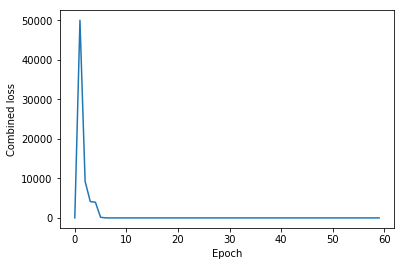

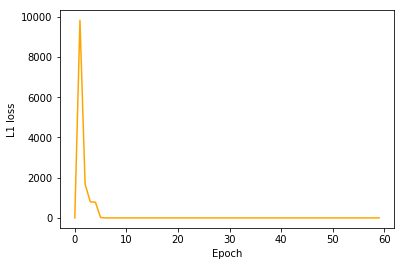

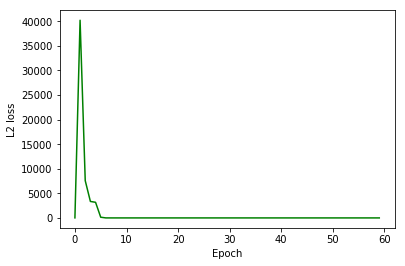

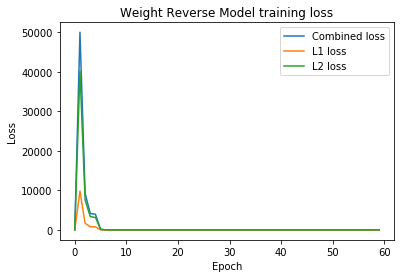

In [7]:
# experiment 1: draw l1, l2, and combined loss (continued)
epoch_indexs = np.arange(len(combined_losses))
plt.plot(epoch_indexs, combined_losses)
plt.xlabel('Epoch')
plt.ylabel('Combined loss')
plt.show()

plt.plot(epoch_indexs, l1_losses, "-", color='orange')
plt.xlabel('Epoch')
plt.ylabel('L1 loss')
plt.show()

plt.plot(epoch_indexs, l2_losses, "g-")
plt.xlabel('Epoch')
plt.ylabel('L2 loss')
plt.show()

plt.plot(epoch_indexs, combined_losses)
plt.plot(epoch_indexs, l1_losses)
plt.plot(epoch_indexs, l2_losses)
plt.legend(['Combined loss', 'L1 loss', 'L2 loss'], loc='upper right')
plt.title('Weight Reverse Model training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# experiment 2: randomly select some weights, to see how predicted weights and approach the ground-truth weights
# experiment 3: based on the experiment 2, how randomly selected converage by different loss functions? Either l1, l2, and combined loss(l1 + l2)


# Record down all observations & Ponder is the loss back-propogation reasonable or not
# Observation 1: Even l1 and l2 are smoonthly converaged, model constructed 
#                by predicted weights only has classification accurancy 
#                around 10%, which does not better than random guess. 